#Time Series ForeCasting.

In [2]:
#Importing the Inbuilt Libraries.
from statsmodels.tsa import seasonal,arima_model;
import pandas as pd;
import numpy as np;

#Importing the Values of the Data.
data=pd.read_csv("/content/AirPassengers.csv");

#printing the Values of the data.
print("\n 1. Total Length of the Data: ",data.shape);
data.head();


 1. Total Length of the Data:  (144, 2)


In [3]:
#Information of the Data Values.
data.info();

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 144 entries, 0 to 143
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Month        144 non-null    object
 1   #Passengers  144 non-null    int64 
dtypes: int64(1), object(1)
memory usage: 2.4+ KB


In [4]:
#Convert the Month Column into Text into the DataTime.
data["Month"]=pd.to_datetime(data["Month"]);
data.head();

In [5]:
data.head(50);

In [6]:
#Set the Month Column as the Index of the Pandas DataFiles.
data.set_index("Month",inplace=True);
data.head();

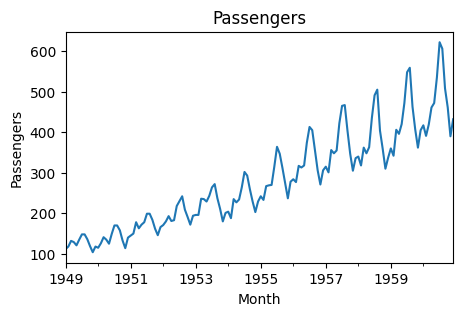

In [17]:
#Let's Visualise the Data.
import matplotlib.pyplot as plt;
data["#Passengers"].plot(figsize=(5,3));
plt.title("Passengers");
plt.xlabel("Month");
plt.ylabel("Passengers");
plt.show();

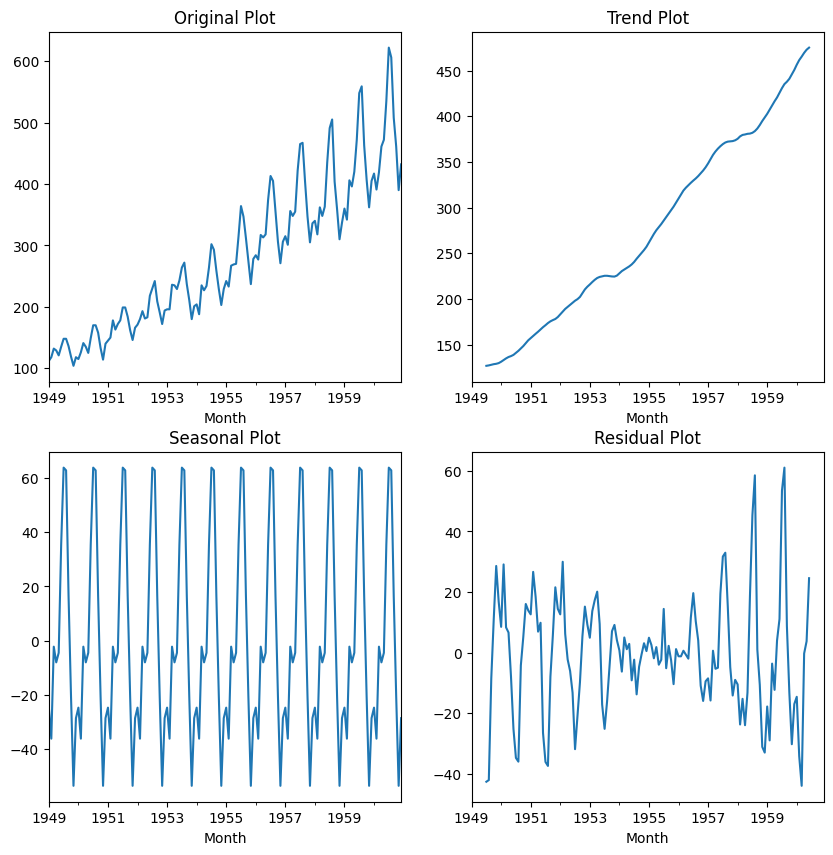

In [18]:
tempData=data["#Passengers"];
OrigData=tempData.copy();

var=seasonal.seasonal_decompose(tempData);
plt.figure(1,figsize=(10,10));
plt.subplot(2,2,1);
var.observed.plot();
plt.title("Original Plot");

plt.subplot(2,2,2);
var.trend.plot();
plt.title("Trend Plot");

plt.subplot(2,2,3);
var.seasonal.plot();
plt.title("Seasonal Plot");

plt.subplot(2,2,4);
var.resid.plot();
plt.title("Residual Plot");

In [21]:
#Let's Create the ForeCaster.
import statsmodels.api as st;

sarima_model = st.tsa.statespace.SARIMAX(tempData,order=(1,1,1),seasonal_order=(1,1,1,12))
#Train the Model.
sarima_model = sarima_model.fit()

# forecaste the value
value_for= sarima_model.forecast()
print(value_for)

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


1961-01-01    449.331718
Freq: MS, dtype: float64


In [22]:
tempData.tail();

In [23]:
# i want to forecast the one year data

num_samples = 12

for i in range(num_samples):
  sarima_model = st.tsa.statespace.SARIMAX(tempData,order=(1,1,1),seasonal_order=(1,1,1,12))
  # train the model
  sarima_model = sarima_model.fit()
  # forecast the value
  value_for= sarima_model.forecast()
  tempData


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_date

In [24]:
tempData = pd.concat([tempData, value_for])
tempData.tail()

1960-09-01    508.000000
1960-10-01    461.000000
1960-11-01    390.000000
1960-12-01    432.000000
1961-01-01    449.331718
dtype: float64

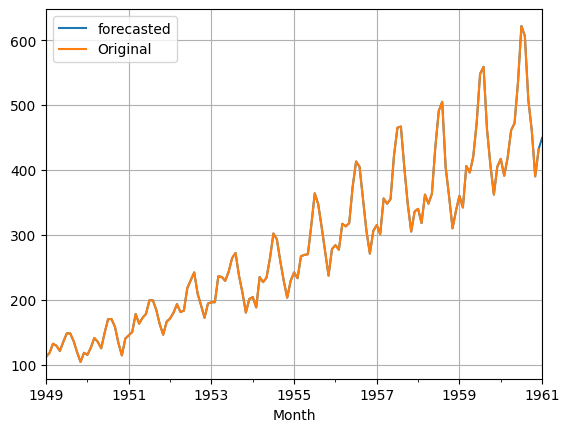

In [25]:
plt.figure(1)
tempData.plot(label='forecasted')
OrigData.plot(label='Original')
plt.legend()
plt.grid('on')

In [27]:
!pip install pmdarima

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 20.9 MB/s eta 0:00:00


In [28]:
from pmdarima import auto_arima;
auto_arima(tempData,seasonal=True,m=12,trace=True)

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(1,1,1)[12]             : AIC=1026.738, Time=5.03 sec
 ARIMA(0,1,0)(0,1,0)[12]             : AIC=1038.552, Time=0.09 sec
 ARIMA(1,1,0)(1,1,0)[12]             : AIC=1027.259, Time=0.41 sec
 ARIMA(0,1,1)(0,1,1)[12]             : AIC=1027.783, Time=0.49 sec
 ARIMA(2,1,2)(0,1,1)[12]             : AIC=1026.760, Time=1.96 sec
 ARIMA(2,1,2)(1,1,0)[12]             : AIC=1026.349, Time=2.70 sec
 ARIMA(2,1,2)(0,1,0)[12]             : AIC=1026.159, Time=0.79 sec
 ARIMA(1,1,2)(0,1,0)[12]             : AIC=1031.042, Time=0.41 sec
 ARIMA(2,1,1)(0,1,0)[12]             : AIC=1024.647, Time=1.06 sec
 ARIMA(2,1,1)(1,1,0)[12]             : AIC=1024.672, Time=1.74 sec
 ARIMA(2,1,1)(0,1,1)[12]             : AIC=1025.133, Time=2.08 sec
 ARIMA(2,1,1)(1,1,1)[12]             : AIC=1024.918, Time=3.80 sec
 ARIMA(1,1,1)(0,1,0)[12]             : AIC=1029.315, Time=0.12 sec
 ARIMA(2,1,0)(0,1,0)[12]             : AIC=1029.325, Time=0.10 sec
 ARIMA(3,1,1)(0,1,0

ARIMA(order=(2, 1, 1), scoring_args={}, seasonal_order=(0, 1, 0, 12),
      suppress_warnings=True, with_intercept=False)

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency informati

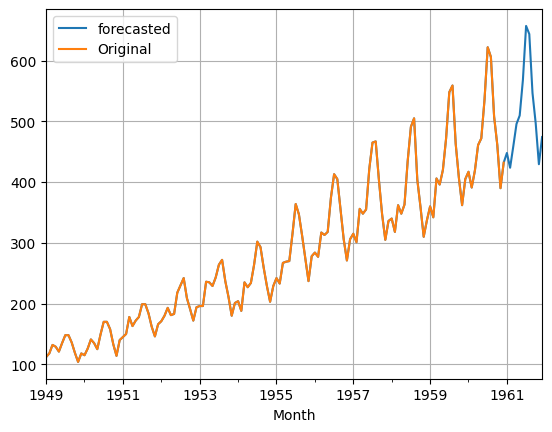

In [29]:
# i want to forecast the one year data
tempData = data['#Passengers']
num_samples = 12

for i in range(num_samples):
  sarima_model = st.tsa.statespace.SARIMAX(tempData,order=(2,1,1),seasonal_order=(2,1,0,12))
  # train the model
  sarima_model = sarima_model.fit()
  # forecast the value
  value_for= sarima_model.forecast()
  tempData = pd.concat([tempData, value_for])

plt.figure(1)
tempData.plot(label='forecasted')
OrigData.plot(label='Original')
plt.legend()
plt.grid('on')

#Now, we Need to Drop the 2-Years of Data and then we have to predict and compatre it with the Original Values of the Data.

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency informati

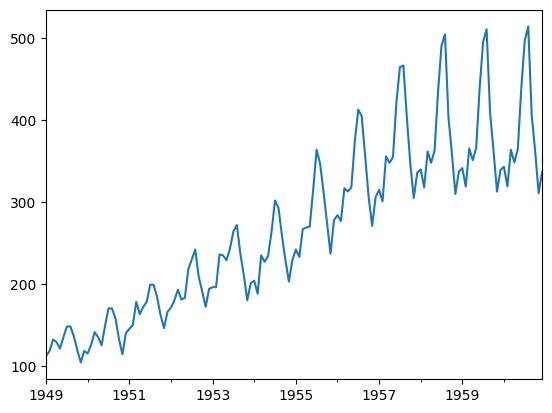

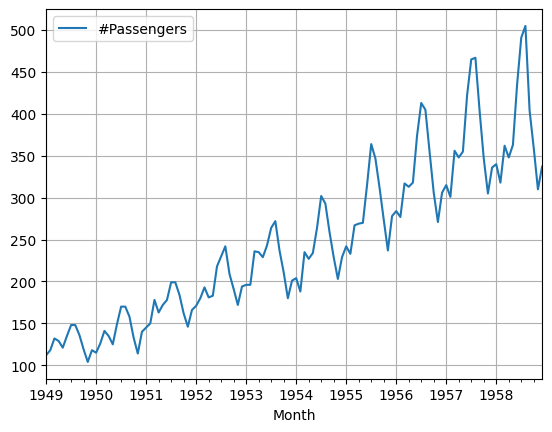

In [38]:
newData = data.iloc[:-24] # -24 means from the end 24 samples deducted
newData.tail()
# i want to forecast the one year data
tempData = newData['#Passengers']
num_samples = 24

for i in range(num_samples):
  sarima_model = st.tsa.statespace.SARIMAX(tempData,order=(2,1,1),seasonal_order=(2,1,0,12))
  # train the model
  sarima_model = sarima_model.fit()
  # forecast the value
  value_for= sarima_model.forecast()
  tempData = pd.concat([tempData, value_for])

plt.figure(1)
tempData.plot(label='forecasted')
newData.plot(label='Original')
plt.legend()
plt.grid('on')

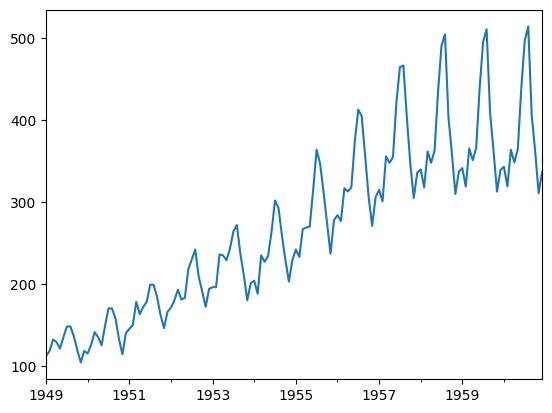

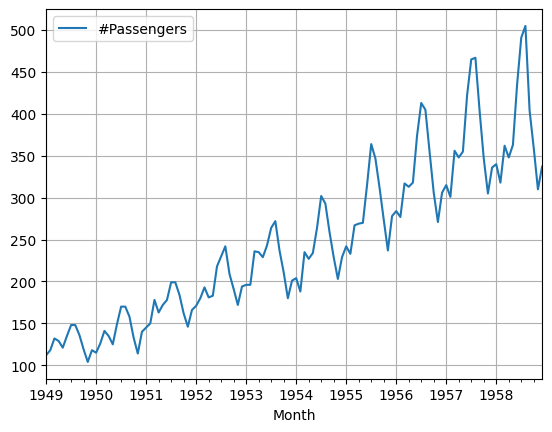

In [39]:
plt.figure(1)
tempData.plot(label='forecasted')
newData.plot(label='Original')
plt.legend()
plt.grid('on')

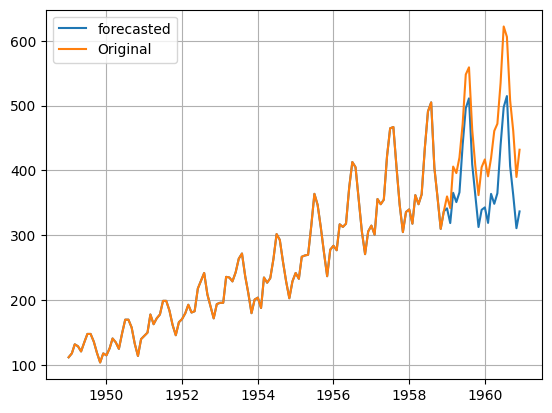

In [40]:
plt.figure(1)
plt.plot(tempData,label='forecasted')
plt.plot(data,label='Original')
ax = plt.legend()
ax = plt.grid('on')

#Milk-Productions Data.

In [50]:
#Importing the Inbuilt Libraries.
from statsmodels.tsa import seasonal,arima_model;
import pandas as pd;
import numpy as np;

#Importing the Values of the Data.
data=pd.read_csv("/content/milk_production_dataset.csv");

#printing the Values of the data.
print("\n 1. Total Length of the Data: ",data.shape);
data.head();


 1. Total Length of the Data:  (170, 2)


In [51]:
#Information of the Data.
data.info();

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 170 entries, 0 to 169
Data columns (total 2 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Month                    169 non-null    object 
 1   Monthly milk production  168 non-null    float64
dtypes: float64(1), object(1)
memory usage: 2.8+ KB


In [52]:
# Remove the first row (assumed to be a header) and reset the index
data = data.iloc[1:].reset_index(drop=True)
# Now try converting the 'Month' column to datetime
# Handle potential format variations using 'infer_datetime_format'
data['Month'] = pd.to_datetime(data['Month'], infer_datetime_format=True, errors='coerce')
# 'errors='coerce'' will set invalid parsing to NaT (Not a Time) which can be handled later
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 169 entries, 0 to 168
Data columns (total 2 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   Month                    167 non-null    datetime64[ns]
 1   Monthly milk production  167 non-null    float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 2.8 KB


<ipython-input-52-db2e5db0d849>:5: UserWarning: The argument 'infer_datetime_format' is deprecated and will be removed in a future version. A strict version of it is now the default, see https://pandas.pydata.org/pdeps/0004-consistent-to-datetime-parsing.html. You can safely remove this argument.
  data['Month'] = pd.to_datetime(data['Month'], infer_datetime_format=True, errors='coerce')


In [53]:
data.head(50);

In [54]:
#Set the Month Column as the Index of the Pandas DataFiles.
data.set_index("Month",inplace=True);
data.head();

<Axes: xlabel='Month'>

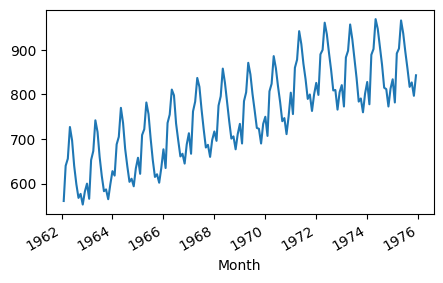

In [55]:
#Let's Visualise the Data.
import matplotlib.pyplot as plt
# visualise the data
data['Monthly milk production'].plot(figsize=(5,3))

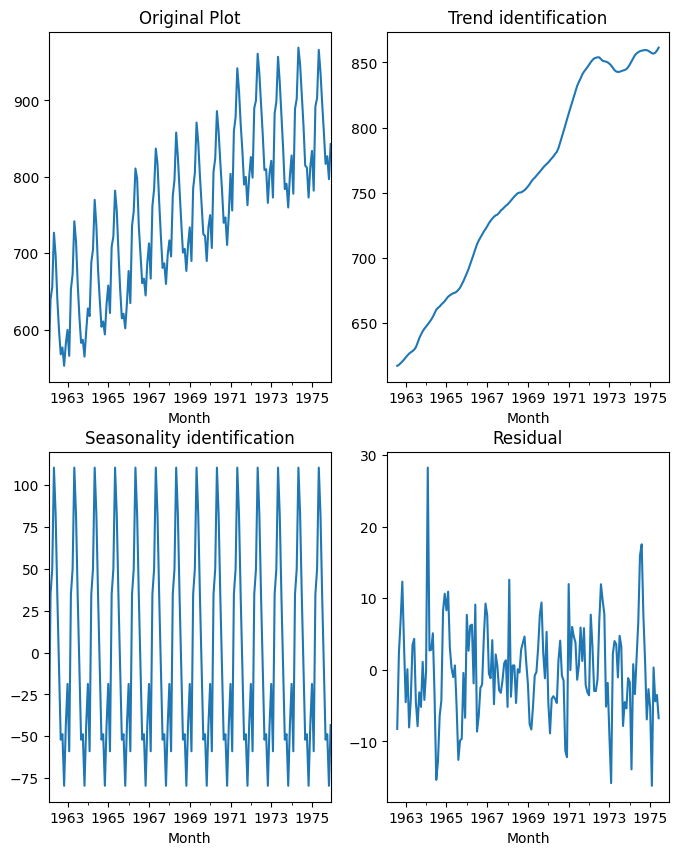

In [63]:
import matplotlib.pyplot as plt
from statsmodels.tsa import seasonal

tempData = data['Monthly milk production']
OrigData = tempData.copy()

# Handle missing values (e.g., fill with the mean)
tempData = tempData.fillna(tempData.mean())  # Or use another method like forward fill or interpolation

# Check for and remove duplicate dates
tempData = tempData[~tempData.index.duplicated()] #This line removes duplicate dates

# Ensure the DatetimeIndex is complete for monthly frequency
tempData = tempData.asfreq('MS') # This line is added to ensure the DatetimeIndex has a monthly frequency

# Now you can set the frequency explicitly
tempData.index.freq = 'MS'

var = seasonal.seasonal_decompose(tempData);
plt.figure(1,(8,10))
plt.subplot(2,2,1)
var.observed.plot()
plt.title('Original Plot');

plt.subplot(2,2,2)
var.trend.plot()
plt.title('Trend identification');

plt.subplot(2,2,3)
var.seasonal.plot()
plt.title('Seasonality identification');

plt.subplot(2,2,4)
var.resid.plot()
plt.title('Residual');

In [64]:
# lets create the forecaster

sarima_model = st.tsa.statespace.SARIMAX(tempData,order=(1,1,1),seasonal_order=(1,1,1,12))
# train the model
sarima_model = sarima_model.fit()

# forecaste the value
value_for= sarima_model.forecast()
print(value_for)


1976-01-01    865.171246
Freq: MS, dtype: float64


In [65]:
tempData.tail()

Month
1975-08-01    858.0
1975-09-01    817.0
1975-10-01    827.0
1975-11-01    797.0
1975-12-01    843.0
Freq: MS, Name: Monthly milk production, dtype: float64

In [66]:
# i want to forecast the one year data
tempData = data['Monthly milk production']
num_samples = 12

for i in range(num_samples):
  sarima_model = st.tsa.statespace.SARIMAX(tempData,order=(1,1,1),seasonal_order=(1,1,1,12))
  # train the model
  sarima_model = sarima_model.fit()
  # forecast the value
  value_for= sarima_model.forecast()
  tempData = pd.concat([tempData, value_for])


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsm

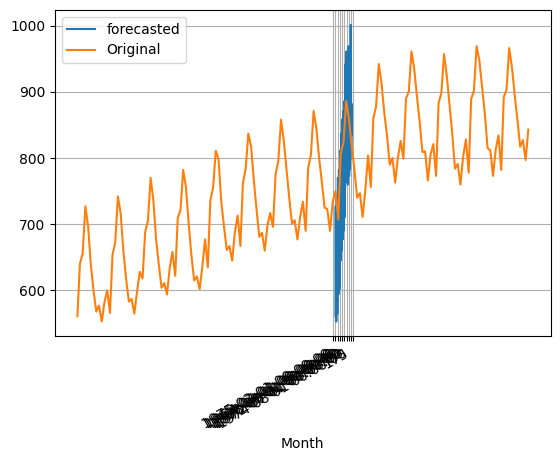

In [67]:
plt.figure(1)
tempData.plot(label='forecasted')
OrigData.plot(label='Original')
plt.legend()
plt.grid('on')